# Analysis of Nursing Homes in Oklahoma

## Bringing in the data and dependecies

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

# Read School and Student Data File and store into Pandas DataFrames
provider_data = pd.read_csv("NH_ProviderInfo_Jun2023.csv")

provider_data.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,31.333,2,0,0.0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2023-06-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,6.667,0,0,0.0,1,650.00,0,1,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",2023-06-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,13.333,0,0,0.0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",2023-06-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,12.667,0,0,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",2023-06-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,32.000,0,1,0.0,2,1625.00,0,2,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",2023-06-01


In [2]:
#provider_data.columns

In [3]:
# Pulling out only the data for Oklahoma
oklahoma_data = provider_data[provider_data["State"] == "OK"]
oklahoma_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,74129,9186280932,710,Tulsa,For profit - Limited Liability company,...,129.500,0,9,8.0,22,207430.15,1,23,"2425 SOUTH MEMORIAL,TULSA,OK,74129",2023-06-01
10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110,4057376601,540,Oklahoma,For profit - Corporation,...,49.333,0,3,8.0,1,5000.00,0,1,"2900 PARKLAWN DRIVE,MIDWEST CITY,OK,73110",2023-06-01
10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,73750,4053756857,360,Kingfisher,For profit - Corporation,...,131.667,1,13,7.0,11,143315.27,1,12,"905 BEALL ROAD,KINGFISHER,OK,73750",2023-06-01
10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139,4056360626,540,Oklahoma,For profit - Partnership,...,29.333,0,8,3.0,1,655.01,0,1,"940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,73139",2023-06-01
10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,73008,4057897242,540,Oklahoma,For profit - Partnership,...,48.667,0,11,12.0,1,655.01,0,1,"7000 NORTHWEST 32ND STREET,BETHANY,OK,73008",2023-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,37E109,COLONIAL MANOR II,120 WEST VERSA,HOLLIS,OK,73550,5806882828,280,Harmon,Government - County,...,40.000,0,1,0.0,1,20780.00,1,2,"120 WEST VERSA,HOLLIS,OK,73550",2023-06-01
10701,37E204,RAINBOW TERRACE CARE CENTER,300 WEST 9TH STREET,WELEETKA,OK,74880,4057862244,530,Okfuskee,For profit - Corporation,...,157.167,0,6,7.0,7,26699.40,1,8,"300 WEST 9TH STREET,WELEETKA,OK,74880",2023-06-01
10702,37E568,NORTH WINDS LIVING CENTER,3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112,4059421014,540,Oklahoma,For profit - Corporation,...,18.000,0,1,0.0,3,2925.00,1,4,"3718 NORTH PORTLAND,OKLAHOMA CITY,OK,73112",2023-06-01
10703,37E624,CALLAWAY NURSING HOME,1300 WEST LINDSEY,SULPHUR,OK,73086,5806222416,490,Murray,For profit - Corporation,...,64.667,0,4,1.0,50,223481.70,2,52,"1300 WEST LINDSEY,SULPHUR,OK,73086",2023-06-01


## Cleaning the Data

In [4]:
# Tested for duplicate rows avvording to 'Provider Name' and 'Provider Address'. There are no duplicates. 
duplicate_names = oklahoma_data[oklahoma_data.duplicated(['Provider Name'])]
duplicate_address = oklahoma_data[oklahoma_data.duplicated(['Provider Address'])]

In [5]:
# Removing columns we will not be using from the data to make it more managable. 
ok_reduced_with_null_data = oklahoma_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Short-Stay QM Rating', 'Staffing Rating', 
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines', 'Total Amount of Fines in Dollars',
        'Total Number of Penalties']]
ok_reduced_data = ok_reduced_with_null_data.dropna()
ok_reduced_data = ok_reduced_data.reset_index()
ok_reduced_data

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,10413,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,10414,375098,EMERALD CARE CENTER MIDWEST,2900 PARKLAWN DRIVE,MIDWEST CITY,OK,For profit - Corporation,4.0,3.0,5.0,5.0,4.0,3.0,0.45934,66.2,1,5000.00,1
2,10415,375102,CIMARRON NURSING CENTER,905 BEALL ROAD,KINGFISHER,OK,For profit - Corporation,1.0,1.0,3.0,4.0,2.0,3.0,0.36072,50.0,11,143315.27,12
3,10416,375106,BROOKWOOD SKILLED NURSING AND THERAPY,940 SOUTHWEST 84TH STREET,OKLAHOMA CITY,OK,For profit - Partnership,4.0,4.0,4.0,4.0,3.0,3.0,0.42126,60.6,1,655.01,1
4,10417,375107,THE GRAND AT BETHANY SKILLED NURSING AND THERAPY,7000 NORTHWEST 32ND STREET,BETHANY,OK,For profit - Partnership,3.0,3.0,3.0,4.0,2.0,2.0,0.44678,66.7,1,655.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,10678,375561,ST. ANN'S SKILLED NURSING AND THERAPY,9400 ST ANN'S DRIVE,OKLAHOMA CITY,OK,For profit - Partnership,3.0,3.0,4.0,5.0,3.0,2.0,0.26693,64.4,1,655.01,1
138,10679,375562,MCMAHON-TOMLINSON NURSING CENTER,2007 NW 52ND STREET,LAWTON,OK,Government - County,1.0,2.0,2.0,2.0,2.0,1.0,0.25939,68.0,2,10087.94,2
139,10683,375566,ELK CROSSING,811 WEST ELK,DUNCAN,OK,For profit - Partnership,5.0,5.0,3.0,3.0,4.0,3.0,0.16578,52.6,1,657.80,1
140,10690,375574,THE LODGE AT BROOKLINE,5301 NORTH BROOKLINE,OKLAHOMA CITY,OK,For profit - Individual,2.0,2.0,4.0,5.0,3.0,4.0,0.43167,35.9,1,3250.00,1


In [6]:
# Pulling only the Tulsa data from the dataset.
tulsa_data = ok_reduced_data[ok_reduced_data["City/Town"] == "TULSA"]
tulsa_data = tulsa_data.reset_index()[['CMS Certification Number (CCN)', 'Provider Name',
       'Provider Address', 'City/Town', 'State', 'Ownership Type',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Long-Stay QM Rating', 'Short-Stay QM Rating', 'Staffing Rating',
       'Reported RN Staffing Hours per Resident per Day',
       'Total nursing staff turnover', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]
tulsa_data

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties
0,375094,EMERALD CARE CENTER TULSA,2425 SOUTH MEMORIAL,TULSA,OK,For profit - Limited Liability company,1.0,1.0,3.0,3.0,2.0,1.0,0.26225,76.7,22,207430.15,23
1,375168,AMBASSADOR MANOR NURSING CENTER,1340 EAST 61ST STREET,TULSA,OK,For profit - Partnership,2.0,2.0,2.0,4.0,1.0,2.0,0.33464,60.0,1,655.01,1
2,375172,SOUTHERN HILLS REHABILITATION CENTER,5170 SOUTH VANDALIA,TULSA,OK,For profit - Corporation,2.0,2.0,2.0,2.0,2.0,2.0,0.30572,74.0,22,83494.15,23
3,375230,LEISURE VILLAGE HEALTH CARE CENTER,2154 SOUTH 85TH EAST AVENUE,TULSA,OK,For profit - Partnership,2.0,2.0,3.0,3.0,2.0,2.0,0.35752,73.4,3,11738.20,3
4,375389,TULSA NURSING CENTER,10912 EAST 14TH STREET,TULSA,OK,For profit - Limited Liability company,3.0,2.0,5.0,5.0,3.0,3.0,0.49927,78.6,1,655.14,2
5,375454,"TRINITY WOODS, INC.",4134 EAST 31ST STREET,TULSA,OK,Non profit - Church related,3.0,3.0,4.0,3.0,5.0,4.0,0.33622,52.1,1,650.00,1
6,375460,"MONTEREAU, INC",6800 SOUTH GRANITE AVENUE,TULSA,OK,Non profit - Corporation,5.0,5.0,4.0,3.0,4.0,4.0,0.51174,66.7,1,650.00,1
7,375476,COVENANT LIVING AT INVERNESS,3800 WEST 71ST STREET SOUTH,TULSA,OK,Non profit - Corporation,4.0,4.0,4.0,3.0,4.0,4.0,0.59124,68.8,0,0.00,0
8,375489,THE COTTAGE EXTENDED CARE,7707 SOUTH MEMORIAL DRIVE,TULSA,OK,For profit - Individual,3.0,3.0,4.0,4.0,3.0,3.0,0.30348,70.3,6,8865.48,6
9,375531,UNIVERSITY VILLAGE RETIREMENT COMMUNITY,8555 SOUTH LEWIS AVENUE,TULSA,OK,For profit - Corporation,3.0,3.0,2.0,1.0,2.0,4.0,0.54460,71.9,1,18547.75,1


## Exploritory Calculations

In [26]:
pd.set_option("display.max_rows", None)
ok_cities_mean = ok_reduced_data[ok_reduced_data["State"] == "OK"].groupby("City/Town")["QM Rating"].mean()
ok_cities_mean.head()

City/Town
ADA        1.5
ALTUS      4.0
ANTLERS    3.5
ARDMORE    3.0
ATOKA      1.0
Name: QM Rating, dtype: float64

In [8]:
State_mean = ok_reduced_data[ok_reduced_data["State"] == "OK"].groupby("State")["QM Rating"].describe()
print(State_mean)

       count      mean      std  min  25%  50%  75%  max
State                                                   
OK     142.0  3.007042  1.11404  1.0  2.0  3.0  4.0  5.0


In [34]:
US_mean=provider_data['QM Rating'].mean()
US_mean

3.59815680693908

In [10]:
tulsa = tulsa_data[tulsa_data["City/Town"] == "TULSA"].groupby("City/Town")["QM Rating"].describe()
stats_ok_tulsa = pd.merge(State_mean, tulsa, how='outer')
ind_value = ['Oklahoma', 'Tulsa']
stats_ok_tulsa = stats_ok_tulsa.set_index([ind_value])
stats_ok_tulsa

,count,mean,std,min,25%,50%,75%,max
Oklahoma,142.0,3.007042,1.114040,1.0,2.00,3.0,4.0,5.0
Tulsa,14.0,3.357143,1.081818,2.0,2.25,3.5,4.0,5.0


## Turnover Analyis

### RN Reported Staff Hours vs Quality Measure Rating

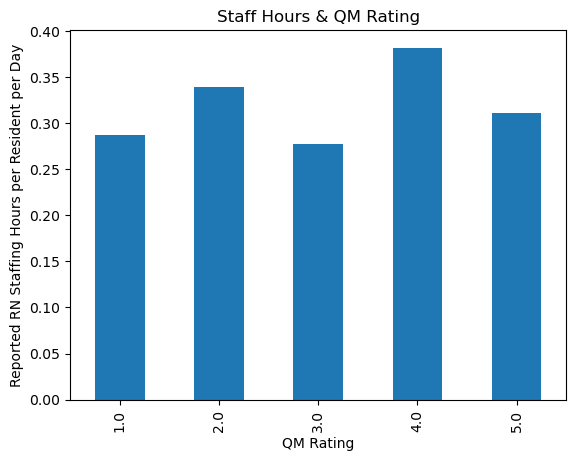

In [37]:
# Evaluating the reported rn staff hours compared to the QM rating
rn_hours=ok_reduced_data.groupby(["QM Rating"]).mean()["Reported RN Staffing Hours per Resident per Day"]
rn_hours.plot(kind='bar')
# plt.bar(QM_Rating,Staffing_hours_per_resident)
plt.ylabel("Reported RN Staffing Hours per Resident per Day")
plt.xlabel("QM Rating")
plt.savefig ("staffinghours.png")
plt.title("Staff Hours & QM Rating")
plt.savefig('bar_staff_hours_vs_qm_rating.png')
plt.show()


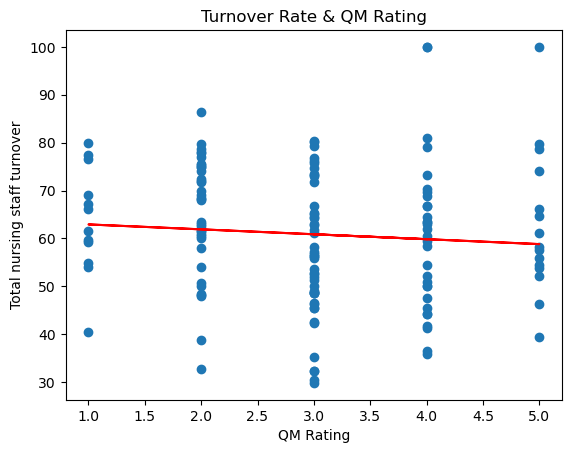

In [44]:
# Add the linear regression equation and line to plot. Null hypothesis says there is no linear trend. 
y_values = ok_reduced_data['Total nursing staff turnover']
x_values = ok_reduced_data['QM Rating']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Total nursing staff turnover')
plt.xlabel('QM Rating')
plt.title("Turnover Rate & QM Rating")
plt.savefig ("scatter_turnover.png")
plt.show()


In [43]:
#print(f"The P value between Total nursing staff turnover and QM rating {round(st.pearsonr(Total_nursing_staff_turnover,QM_Rating)[1],2)}")
print(f"The P value between Total nursing staff turnover and QM rating {round(st.pearsonr(x_values,y_values)[1], 2)}")

The P value between Total nursing staff turnover and QM rating 0.34


## Total Fines Analysis

### Average Number of Fines VS QM Rating

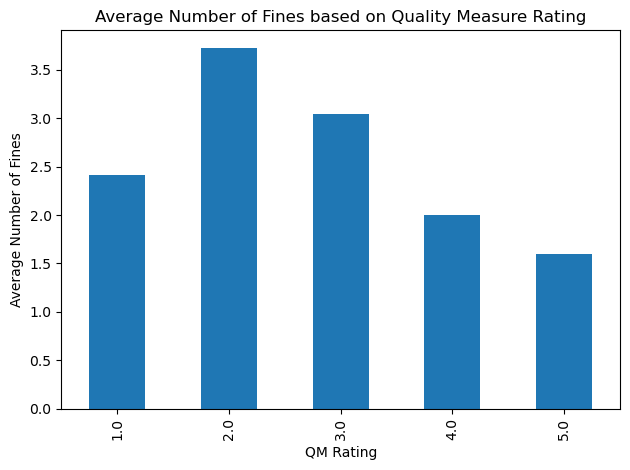

In [14]:
# This is examining the relationship between the quality measure and the average number of fines per nursing home
x_value_rating = ok_reduced_data.groupby(['QM Rating']).mean()['Number of Fines']
x_value_rating.plot.bar(ylabel='Average Number of Fines', title='Average Number of Fines based on Quality Measure Rating')
plt.tight_layout()
plt.savefig('bar_avg_fines_vs_QM.png')

### Total Number of Fines VS Staffed Nursing Hours

In [15]:
#Binning based on the number of fines. 
fine_bins = [-.01,3,6,10,19,29, 35]
labels = ["0-3 fines","4-6 fines", "7-10 fines", "11-19 fines", "20-29 fines", "30+ fines"]

grouped_fines = pd.cut(ok_reduced_data['Number of Fines'], bins=fine_bins, labels=labels)

ok_reduced_data['Fine Categories'] = grouped_fines
ok_data_fines = ok_reduced_data[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Number of Fines','Fine Categories',
       'Total Amount of Fines in Dollars', 'Total Number of Penalties']]

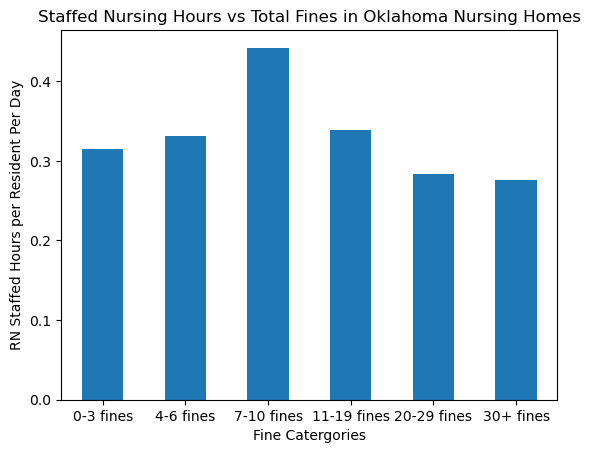

In [16]:
#creating the graph to compare staffed hours and total fines
x_val_fine = ok_reduced_data.groupby(['Fine Categories']).mean()['Reported RN Staffing Hours per Resident per Day']
x_val_fine.plot(kind = "bar", xlabel='Fine Catergories', ylabel='RN Staffed Hours per Resident Per Day', title='Staffed Nursing Hours vs Total Fines in Oklahoma Nursing Homes', rot=0)
plt.savefig('bar_nurse_hours_vs_total_fines.png')

The correlation between the total fines and the reported RN staffed hours per day is -0.18. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression. The p-value of linear trend is 0.54, therefor we can confidently say there is no trend.


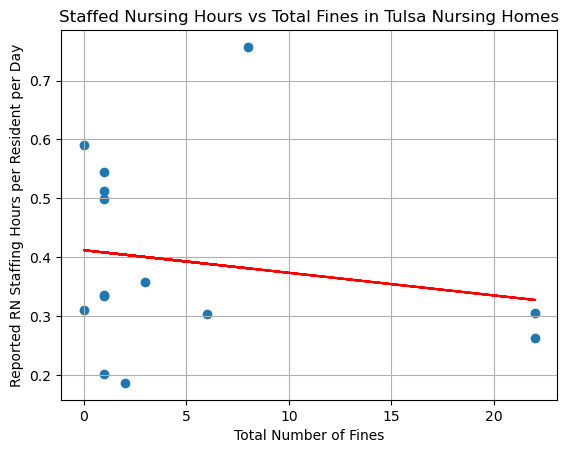

In [47]:
#Another evaluation of the staffing hours being affected by the total number of fines. 
x_val = tulsa_data['Number of Fines']
y_val = tulsa_data['Reported RN Staffing Hours per Resident per Day']

cor_coefficent, p_value = st.pearsonr(x_val, y_val)

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
plt.plot(x_val, (slope*x_val + intercept), color="red")
plt.scatter(x_val, y_val)
plt.ylabel('Reported RN Staffing Hours per Resident per Day')
plt.xlabel('Total Number of Fines')
plt.title('Staffed Nursing Hours vs Total Fines in Tulsa Nursing Homes')
plt.grid()
plt.savefig('scatter_nurse_hours_vs_fines.png')

print(f"The correlation between the total fines and the reported RN staffed hours per day is {round(cor_coefficent,2)}. This means that there is a weak, negative correlation. The total number of fines is affected negatively based on the total number of hours staffed, but not by a lot. This can be seen by the relatively horizontal linear regression. The p-value of linear trend is {round(p_value,2)}, therefor we can confidently say there is no trend.")

## Evaluating Ownership

### Ownerships vs QM rating

In [18]:
# calculating mean QM rating for each type of ownership
ok_reduced_data.groupby(["Ownership Type"]).mean()["QM Rating"]

Ownership Type
For profit - Corporation                  2.820000
For profit - Individual                   2.777778
For profit - Limited Liability company    2.875000
For profit - Partnership                  3.322581
Government - City                         4.000000
Government - County                       2.000000
Non profit - Church related               3.000000
Non profit - Corporation                  3.636364
Non profit - Other                        3.000000
Name: QM Rating, dtype: float64

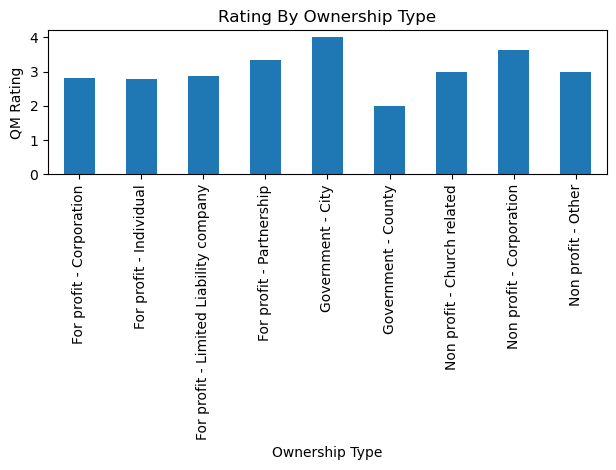

In [49]:
#Analyzing the QM rating based on ownership type
ownership_type = ok_reduced_data.groupby(["Ownership Type"]).mean()["QM Rating"]
ownership_type.plot(kind = "bar" , xlabel = "Ownership Type" , ylabel = "QM Rating" , title = "Rating By Ownership Type")
plt.tight_layout()
plt.savefig('ownership_type_hours_vs_qm_rating.png')

In [20]:
#Getting a count of homes by ownership type
num_owner = ok_reduced_data.groupby('Ownership Type').count()['Provider Name']
num_owner

Ownership Type
For profit - Corporation                  50
For profit - Individual                   18
For profit - Limited Liability company    24
For profit - Partnership                  31
Government - City                          1
Government - County                        1
Non profit - Church related                4
Non profit - Corporation                  11
Non profit - Other                         2
Name: Provider Name, dtype: int64

In [21]:
# Pulling out the government owned nursing homes
county_data = ok_reduced_data[ok_reduced_data["Ownership Type"] == "Government - County"]
city_data = ok_reduced_data[ok_reduced_data["Ownership Type"] == "Government - City"]
government_data = pd.merge(county_data , city_data , how = "outer")
government_data

,index,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,Ownership Type,Overall Rating,Health Inspection Rating,QM Rating,Long-Stay QM Rating,Short-Stay QM Rating,Staffing Rating,Reported RN Staffing Hours per Resident per Day,Total nursing staff turnover,Number of Fines,Total Amount of Fines in Dollars,Total Number of Penalties,Fine Categories
0,10679,375562,MCMAHON-TOMLINSON NURSING CENTER,2007 NW 52ND STREET,LAWTON,OK,Government - County,1.0,2.0,2.0,2.0,2.0,1.0,0.25939,68.0,2,10087.94,2,0-3 fines
1,10677,375560,SPANISH COVE HOUSING AUTHORITY,11 PALM STREET,YUKON,OK,Government - City,5.0,5.0,4.0,4.0,3.0,5.0,0.52445,36.4,0,0.00,0,0-3 fines


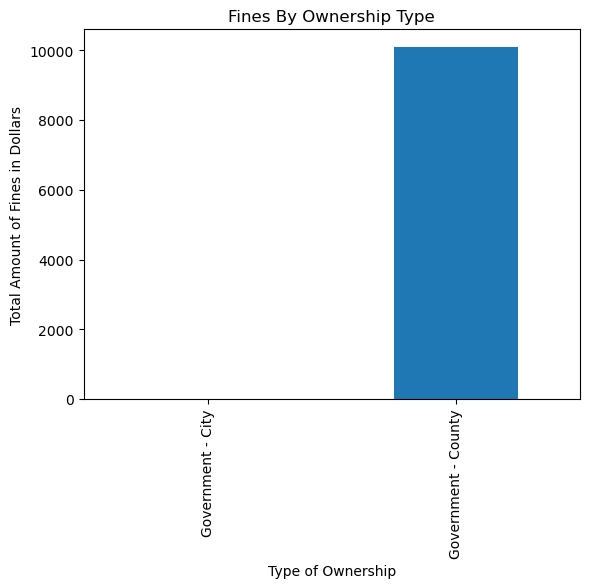

In [22]:
# Evaluting if the total fines owed by a nursing home contributes to the disparity in QM rating seen above
fine_type = government_data.groupby(["Ownership Type"]).mean()["Total Amount of Fines in Dollars"]
fine_type.plot(kind = "bar" , xlabel = "Type of Ownership" , ylabel = "Total Amount of Fines in Dollars" , title = "Fines By Ownership Type")

plt.savefig('fines_in_dollar_vs_ownership_type.png')

In [23]:
correlation_one = ok_reduced_data["QM Rating"].corr(ok_reduced_data["Total Amount of Fines in Dollars"])
correlation_one

-0.11272834364174013

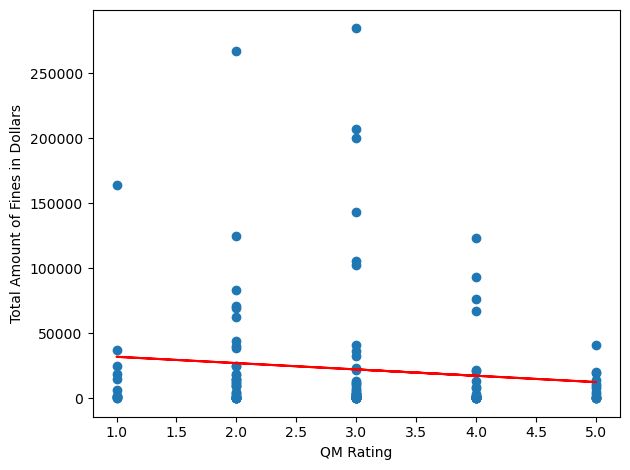

In [51]:
y_scatter = ok_reduced_data["Total Amount of Fines in Dollars"]
x_scatter = ok_reduced_data["QM Rating"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept
# line_eq = "y - " + str(round(slope,2)) + "x -" + str(round(intercept,2))

plt.scatter(x_scatter,y_scatter)
plt.plot(x_scatter, regress_values , 'r-')
# plt.annotate(line_eq,(5.8,0.8), fontsize = 15, color = "green")
plt.ylabel("Total Amount of Fines in Dollars")
plt.xlabel("QM Rating")
plt.tight_layout()
plt.savefig('fines_in_dollars_vs_quality_rating.png')
plt.show()